In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# load data
sp500 = pd.read_csv("sp500_data_cleaned.csv", header=[0,1], index_col=0)

# extract returns
returns = sp500[('Log Returns', '^GSPC')]
returns = returns.sort_index()  # sort by date

# summary
print(returns.describe())


count    2515.000000
mean        0.000417
std         0.011270
min        -0.127652
25%        -0.003783
50%         0.000636
75%         0.005739
max         0.089683
Name: (Log Returns, ^GSPC), dtype: float64


#### Compute Rolling VaR for a 95% Confidence Level

In [3]:
# 250 rolling window
window = 250
# rolling 5th percentile (historical VaR) for each day where the window is available.
# (lower returns are worse; the quantile is negative; we report magnitude as positive loss later.)
rolling_VaR = returns.rolling(window=window).quantile(0.05)

#### Identify Exceptions (VaR Breaches)
For each day after the rolling window, an exception occurs when the actual return is less than the computed rolling VaR:

In [5]:
# compute if there is an exception.
# exception occurs when the actual return is below the VaR threshold.
exceptions = returns[window:] < rolling_VaR[window:]

# total number of exceptions and compute the exception rate.
exception_count = exceptions.sum()
total_test_days = len(returns[window:])
exception_rate = exception_count / total_test_days

print(f"Out of {total_test_days} test days, there were {exception_count} exceptions.")
print(f"Exception Rate: {exception_rate*100:.2f}%")

Out of 2265 test days, there were 114 exceptions.
Exception Rate: 5.03%


#### Plotting the Backtesting Results

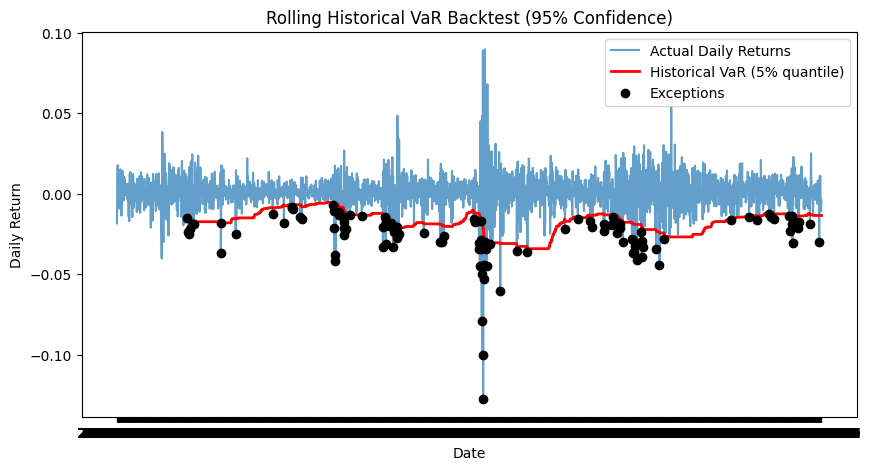

In [6]:
plt.figure(figsize=(10, 5))
plt.plot(returns.index, returns, label="Actual Daily Returns", alpha=0.7)
plt.plot(rolling_VaR.index, rolling_VaR, label="Historical VaR (5% quantile)", color="red", linewidth=2)

# mark exceptions on the plot
exception_dates = returns[window:][exceptions].index
plt.scatter(exception_dates, returns[window:][exceptions], color="black", label="Exceptions", zorder=5)

plt.title("Rolling Historical VaR Backtest (95% Confidence)")
plt.xlabel("Date")
plt.ylabel("Daily Return")
plt.legend()
plt.show()